In [1]:
import specpolFlow.iolsd as iolsd
import matplotlib.pyplot as plt
import numpy as np

loading specpolFlow package
importing specpolFlow.iolsd


In [2]:
#iolsd.read_lsd is used to read lsd data into an object
lsd1 = iolsd.read_lsd('SampleData/SampleLSD.s')
#for the sake of the tutorial, I'm making two objects, though we only have the one dataset
lsd2 = iolsd.read_lsd('SampleData/SampleLSD.s')

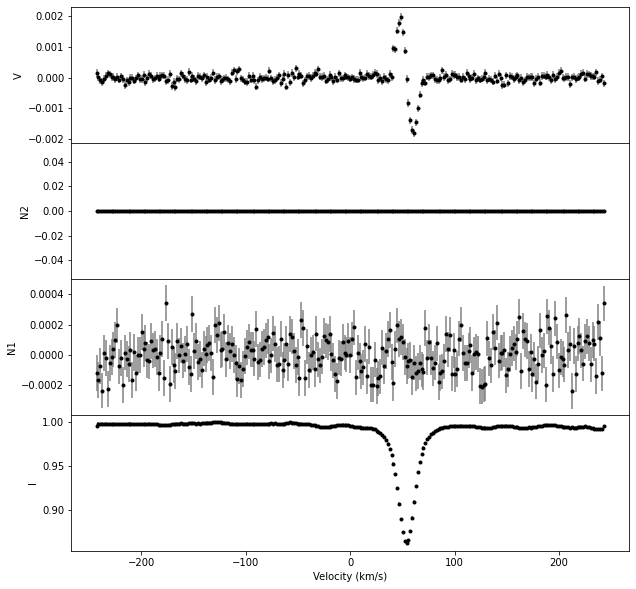

In [3]:
#iolsd.plot_lsd is used to plot lsd data. 
#figsize is an optional argument, which changes the size of the image created.
#the default size is (10,10)
fig, ax = lsd1.plot(figsize=(10,10))

In [4]:
#the variables inside the lsd profile are arrays of values, including
#vel; the velocity grid 
#specI and specSigI; the Stokes I profile and its uncertainties
#specV and specSigV; the Stokes V polarization profile and its uncertainties
#specN1 and specSigN1; the Null1 profile and its uncertainties
#specN2 and specSigN2; the (optional) Null2 profile and its uncertainties 
#header; the header of the file that was read to create the lsd_prof

In [5]:
#you are able to select subsections of lsd data in the same way you do with arrays;
#this will create an lsd profile with the items from indices 10 to 50. 
lsdslice = lsd1[10:50]

#this will create an lsd profile with all data points where vel>0 and vel<100
lsdpos = lsd1[lsd1.vel>0]
lsdpos = lsdpos[lsdpos.vel<100]

#you can also replace parts of one lsd profile with another one, so long as the parts being replaced are of equal size.
lsd1[0:10] = lsd2[50:60]

In [6]:
#you can multiply an lsd profile by some scalar, which will multiply all the contents by that number
#EXCEPT for the velocity 
#You can also add/subtract an lsd profile, which scales ONLY the velocity
lsd1 = lsd1*5

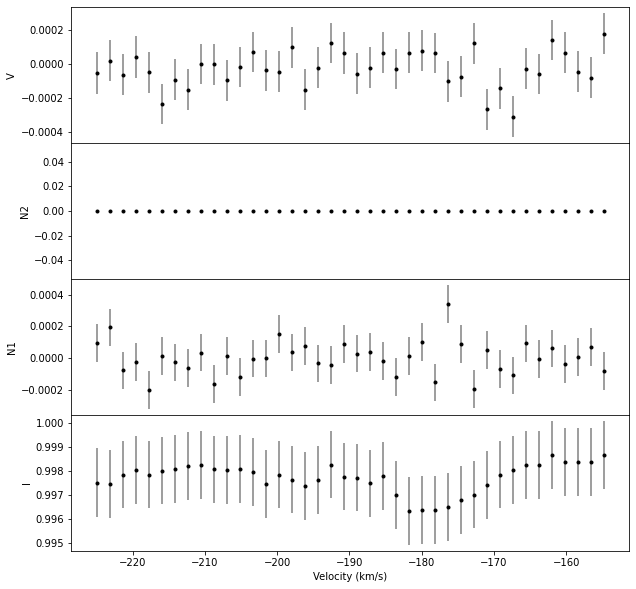

In [7]:
fig, ax = lsdslice.plot(figsize=(10,10))

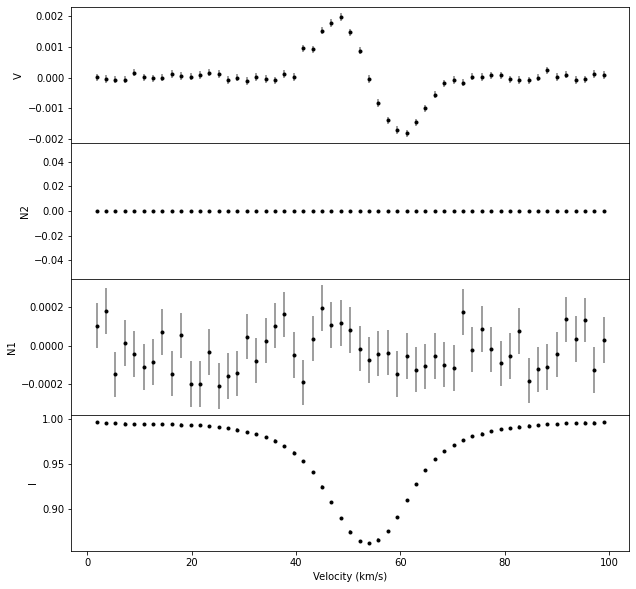

In [8]:
fig, ax = lsdpos.plot(figsize=(10,10))

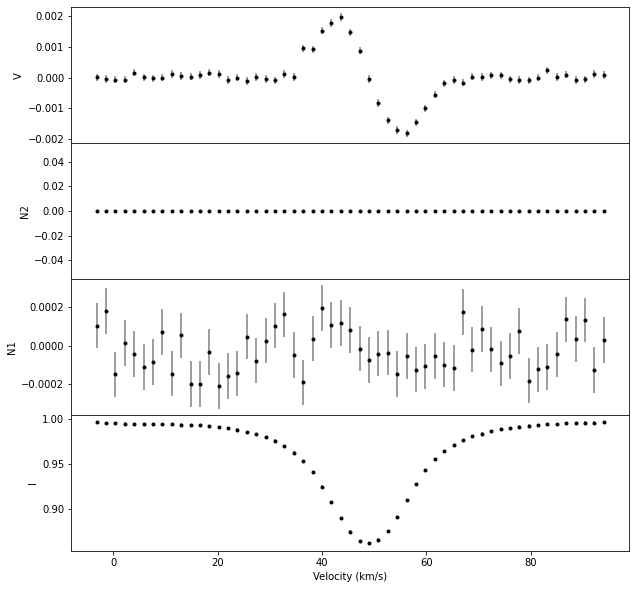

In [10]:
lsd2 = lsdpos-10
fig, ax = lsd2.plot()